# Spatial evolutionary game simulator

S. Kolotev, A. Malyutin, E. Burovski, S. Krashakov and L. Shchur, *Dynamic fractals in spatial evolutionary games*, Physica A **499**, 142 (2018).

with 
Aleksander Malyutin (BSc'19), Sergey Kolotev (MSc'18), Bulat Zinnurov (BSc'19), Dmitri Antonov (BSc'22), 
Roman Moskalenko (BSc'23)

In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

In [2]:
import sys
import cython

print("python ", sys.version)
print("numpy", np.__version__, ", matplotlib", mpl.__version__, ", and Cython", cython.__version__)

python  3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
numpy 1.20.2 , matplotlib 3.4.2 , and Cython 0.29.23


## Main update function:

In [3]:
def evolve2(field, b, num_steps=1):
    L = field.shape[0]
    current = np.zeros((L, L), dtype=int)
    scores = np.zeros((L, L), dtype=float)
    
    for step in range(num_steps):
        current = field.copy()
        scores = np.zeros((L, L), dtype=float)
        
        for x in range(L):
            for y in range(L):
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        ix = (x + i) % L
                        jy = (y + j) % L
                        scores[x, y] += (1 - field[ix, jy])
                        
                if field[x, y] == 1:
                    scores[x, y] *= b
        
        for x in range(L):
            for y in range(L):
                bestX = x
                bestY = y
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        ix = (x + i) % L
                        jy = (y + j) % L
                        if (scores[bestX, bestY] < scores[ix, jy]):
                            bestX = ix
                            bestY = jy
                
                field[x, y] = current[bestX, bestY]
    return field

### Run the simulation and animate

<IPython.core.display.Javascript object>


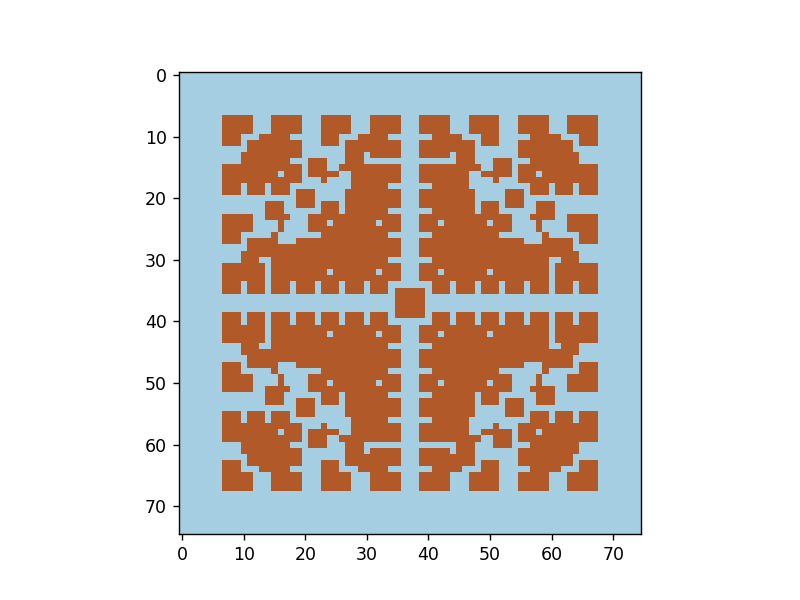

In [5]:
L = 75
field = np.zeros((L, L), dtype=int)
field[L//2, L//2] = 1

# draw the initial field
fig = plt.figure()
im = plt.imshow(field, animated=True, cmap=plt.get_cmap('Paired'))

# updater function
def updatefig(*args):
    global field
    field = evolve2(field, 1.81, 1)
    im.set_array(field)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50, blit=True)

plt.show()

### Timings

In [5]:
L = 44
field = np.zeros((L, L), dtype=int)
field[L//2, L//2] = 1

%timeit evolve2(field, 1.81, 10)

345 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Enter Cython

In [6]:
%load_ext cython